In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
import plotly
import plotly.express as px
import plotly.graph_objects as go

ModuleNotFoundError: No module named 'numpy'

In [2]:
data1 = "halftime_musician.csv"
musicians_df = pd.read_csv(data1)
musicians_df.head(5)

,super_bowl,musician,num_songs
0,52,Justin Timberlake,11.0
1,52,University of Minnesota Marching Band,1.0
2,51,Lady Gaga,7.0
3,50,Coldplay,6.0
4,50,Beyoncé,3.0


In [3]:
data2 = "super_bowls.csv"
super_bowls_df = pd.read_csv(data2) 
super_bowls_df.head(5)

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,qb_winner_2,coach_winner,team_loser,losing_pts,qb_loser_1,qb_loser_2,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,NaN,Doug Pederson,New England Patriots,33,Tom Brady,NaN,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,NaN,Bill Belichick,Atlanta Falcons,28,Matt Ryan,NaN,Dan Quinn,62,6
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,NaN,Gary Kubiak,Carolina Panthers,10,Cam Newton,NaN,Ron Rivera,34,14
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,NaN,Bill Belichick,Seattle Seahawks,24,Russell Wilson,NaN,Pete Carroll,52,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,NaN,Pete Carroll,Denver Broncos,8,Peyton Manning,NaN,John Fox,51,35


In [4]:
data3 = "super-bowl-ratings.csv"
super_bowl_ratings_df = pd.read_csv(data3)
super_bowl_ratings_df.tail(5)

,super_bowl,super_bowl_number,date,network,average_viewers,total_viewers,household_rating,household_share,cost_of_30_second_ad_usd
50,LI,51,2017-02-05,Fox,111320000,172000000.0,45.3,70,5399873
51,LII,52,2018-02-04,NBC,103470000,NaN,43.1,68,5235379
52,LIII,53,2019-02-03,CBS,98480000,149000000.0,41.1,67,5199916
53,LIV,54,2020-02-02,Fox,101320000,148500000.0,41.6,69,5400000
54,LV,55,2021-02-07,CBS,98200000,NaN,38.2,68,5500000


En primer lugar vamos a echar un rápido vistazo a nuestros datasets para ver cómo están compuestos.

In [5]:
musicians_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   super_bowl  134 non-null    int64  
 1   musician    134 non-null    object 
 2   num_songs   88 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 3.3+ KB


In [6]:
musicians_df.describe()

,super_bowl,num_songs
count,134.000000,88.000000
mean,29.089552,2.954545
std,14.914021,2.318883
min,1.000000,1.000000
25%,17.250000,1.000000
50%,31.500000,2.000000
75%,41.000000,3.250000
max,52.000000,11.000000


In [7]:
super_bowls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 18 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            52 non-null     object
 1   super_bowl      52 non-null     int64 
 2   venue           52 non-null     object
 3   city            52 non-null     object
 4   state           52 non-null     object
 5   attendance      52 non-null     int64 
 6   team_winner     52 non-null     object
 7   winning_pts     52 non-null     int64 
 8   qb_winner_1     52 non-null     object
 9   qb_winner_2     2 non-null      object
 10  coach_winner    52 non-null     object
 11  team_loser      52 non-null     object
 12  losing_pts      52 non-null     int64 
 13  qb_loser_1      52 non-null     object
 14  qb_loser_2      3 non-null      object
 15  coach_loser     52 non-null     object
 16  combined_pts    52 non-null     int64 
 17  difference_pts  52 non-null     int64 
dtypes: int64(6),

In [8]:
super_bowls_df.describe()


,super_bowl,attendance,winning_pts,losing_pts,combined_pts,difference_pts
count,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000
mean,26.500000,77455.942308,30.423077,16.384615,46.807692,14.038462
std,15.154757,10373.651925,9.657561,7.306065,13.535775,10.491755
min,1.000000,61946.000000,14.000000,3.000000,21.000000,1.000000
25%,13.750000,71419.000000,23.750000,10.000000,37.000000,4.750000
50%,26.500000,74083.000000,30.500000,17.000000,46.500000,12.000000
75%,39.250000,80280.750000,35.000000,21.000000,56.000000,19.000000
max,52.000000,103985.000000,55.000000,33.000000,75.000000,45.000000


In [9]:
super_bowl_ratings_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 55 entries, 0 to 54
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   super_bowl                55 non-null     object 
 1   super_bowl_number         55 non-null     int64  
 2   date                      55 non-null     object 
 3   network                   55 non-null     object 
 4   average_viewers           55 non-null     int64  
 5   total_viewers             52 non-null     float64
 6   household_rating          55 non-null     float64
 7   household_share           55 non-null     int64  
 8   cost_of_30_second_ad_usd  55 non-null     int64  
dtypes: float64(2), int64(4), object(3)
memory usage: 4.0+ KB


In [10]:
super_bowl_ratings_df.describe()

,super_bowl_number,average_viewers,total_viewers,household_rating,household_share,cost_of_30_second_ad_usd
count,55.00000,5.500000e+01,5.200000e+01,55.000000,55.000000,5.500000e+01
mean,28.00000,8.270818e+07,1.169133e+08,42.934545,66.763636,1.693144e+06
std,16.02082,2.084626e+07,3.447969e+07,4.512338,5.984435,1.711794e+06
min,1.00000,2.443000e+07,3.560000e+07,18.500000,36.000000,3.750000e+04
25%,14.50000,7.549000e+07,9.750750e+07,41.200000,63.000000,2.485000e+05
50%,28.00000,8.607000e+07,1.261400e+08,43.100000,68.000000,9.000000e+05
75%,41.50000,9.576500e+07,1.401850e+08,46.000000,70.000000,2.599982e+06
max,55.00000,1.144400e+08,1.720000e+08,49.100000,78.000000,5.500000e+06


Vamos a limpiar un poco los datos y eliminar las columnas que no nos interesan.

In [11]:
super_bowls_df = super_bowls_df.drop(columns=["qb_winner_2", "qb_loser_2"], errors="ignore")
musicians_df = musicians_df.drop(columns=["num_songs"], errors="ignore")

In [12]:
super_bowls_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   date            52 non-null     object
 1   super_bowl      52 non-null     int64 
 2   venue           52 non-null     object
 3   city            52 non-null     object
 4   state           52 non-null     object
 5   attendance      52 non-null     int64 
 6   team_winner     52 non-null     object
 7   winning_pts     52 non-null     int64 
 8   qb_winner_1     52 non-null     object
 9   coach_winner    52 non-null     object
 10  team_loser      52 non-null     object
 11  losing_pts      52 non-null     int64 
 12  qb_loser_1      52 non-null     object
 13  coach_loser     52 non-null     object
 14  combined_pts    52 non-null     int64 
 15  difference_pts  52 non-null     int64 
dtypes: int64(6), object(10)
memory usage: 6.6+ KB


In [13]:
musicians_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 134 entries, 0 to 133
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   super_bowl  134 non-null    int64 
 1   musician    134 non-null    object
dtypes: int64(1), object(1)
memory usage: 2.2+ KB


In [14]:
super_bowls_df.head(2)

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,coach_winner,team_loser,losing_pts,qb_loser_1,coach_loser,combined_pts,difference_pts
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,Doug Pederson,New England Patriots,33,Tom Brady,Bill Belichick,74,8
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,Bill Belichick,Atlanta Falcons,28,Matt Ryan,Dan Quinn,62,6


In [15]:
musicians_df.head(2)

,super_bowl,musician
0,52,Justin Timberlake
1,52,University of Minnesota Marching Band


In [16]:
musicians_df.tail(2)

,super_bowl,musician
132,1,Grambling State University Tiger Marching Band
133,1,Al Hirt


In [17]:
super_bowls_df.tail(2)

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,coach_winner,team_loser,losing_pts,qb_loser_1,coach_loser,combined_pts,difference_pts
50,1968-01-14,2,Orange Bowl,Miami,Florida,75546,Green Bay Packers,33,Bart Starr,Vince Lombardi,Oakland Raiders,14,Daryle Lamonica,John Rauch,47,19
51,1967-01-15,1,Memorial Coliseum,Los Angeles,California,61946,Green Bay Packers,35,Bart Starr,Vince Lombardi,Kansas City Chiefs,10,Len Dawson,Hank Stram,45,25


In [18]:
musicians_grouped = musicians_df.groupby("super_bowl")["musician"].apply(", ".join).reset_index()
musicians_grouped.tail(2)

,super_bowl,musician
50,51,Lady Gaga
51,52,"Justin Timberlake, University of Minnesota Mar..."


In [19]:
super_bowls_full= pd.merge(
    super_bowls_df,
    musicians_grouped,
    on="super_bowl",
    how="left"
)

In [20]:
super_bowls_full.head(2)

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,coach_winner,team_loser,losing_pts,qb_loser_1,coach_loser,combined_pts,difference_pts,musician
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,Doug Pederson,New England Patriots,33,Tom Brady,Bill Belichick,74,8,"Justin Timberlake, University of Minnesota Mar..."
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,Bill Belichick,Atlanta Falcons,28,Matt Ryan,Dan Quinn,62,6,Lady Gaga


In [21]:
super_bowl_ratings_df.tail(2)

,super_bowl,super_bowl_number,date,network,average_viewers,total_viewers,household_rating,household_share,cost_of_30_second_ad_usd
53,LIV,54,2020-02-02,Fox,101320000,148500000.0,41.6,69,5400000
54,LV,55,2021-02-07,CBS,98200000,NaN,38.2,68,5500000


In [22]:
super_bowl_ratings_df["network"].nunique()

4

Vamos a comprobar como  aumenta o disminuye la audiencia de la Super Bowl en función de diferentes parámetros.

#Hipótesis 1: El aumento del precio de los anuncios depende principalmente de los niveles de audiencia.

#Hipótesis 2:  El número de artistas contratados no influye tanto en la audiencia como lo hace el caché de estos artistas.

#Hipótesis combinada: El caché de los artistas que actúan durante el Halftime Show de la superbowl influye directamente en el precio de los anuncios.

In [23]:
super_bowl_ratings_df["date"] = pd.to_datetime(super_bowl_ratings_df["date"], errors="coerce")
super_bowl_ratings_df["year"] = super_bowl_ratings_df["date"].dt.year

In [24]:
viewers_network = px.line(
    super_bowl_ratings_df,
    x="year", 
    y="average_viewers",
    color="network",
    markers=True,
    title="Average Super Bowl Viewers by Network per Year"
)
viewers_network.update_layout(xaxis_title="Year", yaxis_title="Average Viewers (millions)")
viewers_network

network
CBS    20
NBC    19
Fox     9
ABC     7
Name: count, dtype: int64

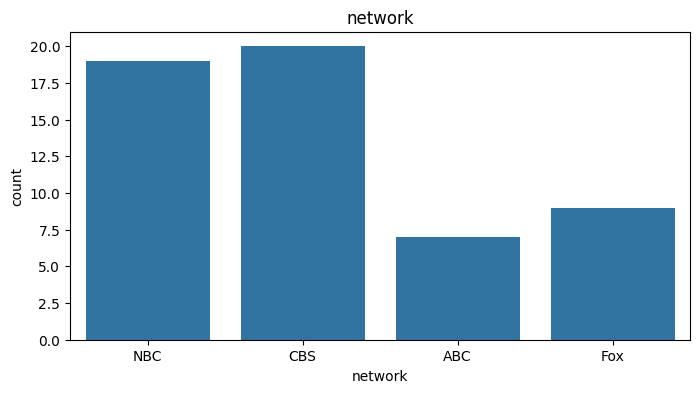

In [25]:
plt.figure(figsize=(8,4))
plt.title("network")
sns.countplot(x=super_bowl_ratings_df['network'])
super_bowl_ratings_df['network'].value_counts()

La victoria de los Patriots de Nueva Inglaterra, equipo de Massachussets(USA) se considera un hito histórico en la SuperBowl siendo la primera vez que un equipo remonta una desventaja de más de 10 puntos tras el descanso.

En 2016 el espectáculo del "half-time show" lo lleva a cabo el grupo inglés Coldplay

C:\Users\alexa\AppData\Local\Temp\ipykernel_15980\2715416882.py:2: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




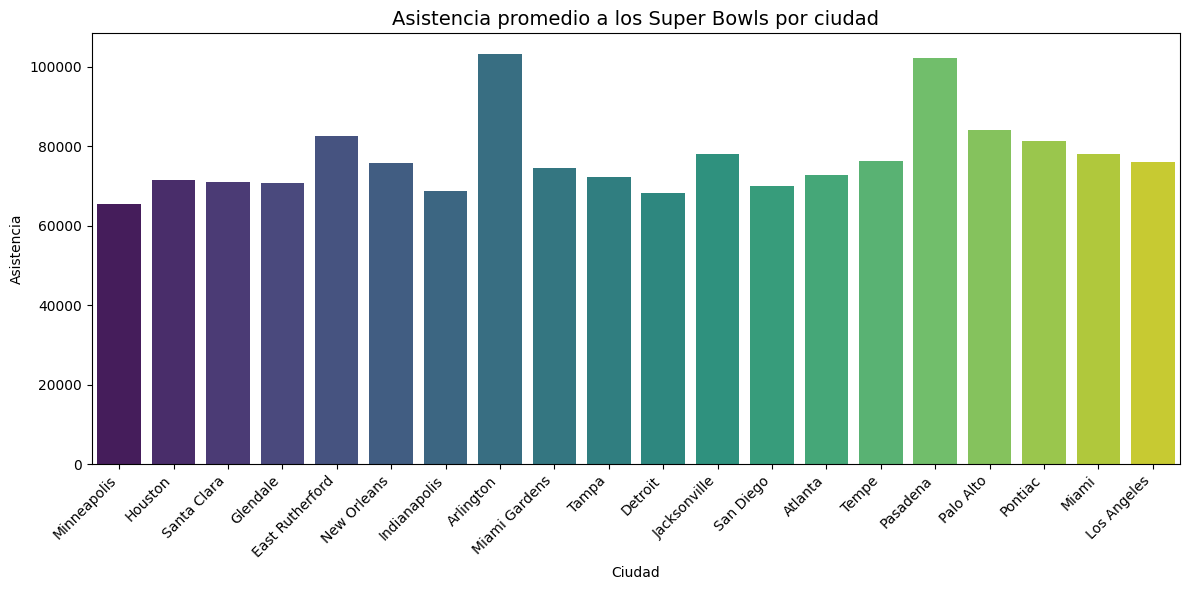

In [26]:
plt.figure(figsize=(12, 6))
sns.barplot(
    data=super_bowls_full,
    x="city",
    y="attendance",
    errorbar=None,
    palette="viridis"
)

plt.title("Asistencia promedio a los Super Bowls por ciudad", fontsize=14)
plt.xlabel("Ciudad")
plt.ylabel("Asistencia")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

Mientras Arlington y Pasadena no son ciudades especialmente pobladas se encuentran respectivamente en los estados de Texas y California siendo California el estado con mayor población de Estados Unidos y en segundo lugar Texas.
Esto nos da una idea de cuánto está dispuesto a desplazarse el espectador promedio de la SuperBowl para asistir al evento

Es importante tener en cuenta que el estadio Cowboys Stadium (antes conocido como AT&t Stadium) es el segundo estadio más grande de los Estados Unidos y Rose Bowl en Pasadena el décimo estadio más grande del país.

Vamos a comprobar si influye en la audiencia el equipo ganador y cómo

In [27]:
super_bowls_full["super_bowl"] = pd.to_numeric(super_bowls_full["super_bowl"], errors="coerce").astype("Int64")
super_bowl_ratings_df["super_bowl"] = pd.to_numeric(super_bowl_ratings_df["super_bowl"], errors="coerce").astype("Int64")

Este Merge lo genera Chat GPT

In [28]:
super_bowls_df["super_bowl"] = pd.to_numeric(super_bowls_df["super_bowl"], errors="coerce").astype("Int64")

# Determinar qué columna usar como clave en ratings
key_col = "super_bowl"
if "super_bowl_number" in super_bowl_ratings_df.columns:
    cnt_sb  = super_bowl_ratings_df["super_bowl"].notna().sum() if "super_bowl" in super_bowl_ratings_df.columns else -1
    cnt_sbn = super_bowl_ratings_df["super_bowl_number"].notna().sum()
    key_col = "super_bowl_number" if cnt_sbn > cnt_sb else "super_bowl"

# Asegurar tipo numérico compatible
super_bowl_ratings_df[key_col] = pd.to_numeric(super_bowl_ratings_df[key_col], errors="coerce").astype("Int64")

# Crear columna 'year' desde la fecha
super_bowl_ratings_df["date"] = pd.to_datetime(super_bowl_ratings_df["date"], errors="coerce")
super_bowl_ratings_df["year"] = super_bowl_ratings_df["date"].dt.year

# 🔗 Merge correcto para alinear datos
teamwinner_audience = pd.merge(
    super_bowls_df[["super_bowl", "team_winner"]],
    super_bowl_ratings_df[[key_col, "year", "average_viewers"]].rename(columns={key_col: "super_bowl"}),
    on="super_bowl",
    how="inner"   # inner = solo los Super Bowls que aparecen en ambos datasets
)

# Verificación rápida
teamwinner_audience.head(10)

,super_bowl,team_winner,year,average_viewers
0,52,Philadelphia Eagles,2018,103470000
1,51,New England Patriots,2017,111320000
2,50,Denver Broncos,2016,111860000
3,49,New England Patriots,2015,114440000
4,48,Seattle Seahawks,2014,112190000
5,47,Baltimore Ravens,2013,108690000
6,46,New York Giants,2012,111350000
7,45,Green Bay Packers,2011,111040000
8,44,New Orleans Saints,2010,106480000
9,43,Pittsburgh Steelers,2009,98730000


In [29]:
avg_team = (
    teamwinner_audience.groupby("team_winner", as_index=False)["average_viewers"]
    .mean()
    .sort_values("average_viewers", ascending=False)
)

teamwinner_audience_fig = px.bar(
    avg_team,
    x="team_winner",
    y="average_viewers",
    title="Promedio de audiencia del Super Bowl por equipo ganador",
    labels={
        "team_winner": "Equipo ganador",
        "average_viewers": "Audiencia promedio (millones)"
    },
    color="average_viewers",
    color_continuous_scale="Viridis"
)

teamwinner_audience_fig.update_layout(xaxis_tickangle=-45, template="plotly_white")
teamwinner_audience_fig.show()

In [30]:
super_bowls_full.head(3)

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,coach_winner,team_loser,losing_pts,qb_loser_1,coach_loser,combined_pts,difference_pts,musician
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,Doug Pederson,New England Patriots,33,Tom Brady,Bill Belichick,74,8,"Justin Timberlake, University of Minnesota Mar..."
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,Bill Belichick,Atlanta Falcons,28,Matt Ryan,Dan Quinn,62,6,Lady Gaga
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,Gary Kubiak,Carolina Panthers,10,Cam Newton,Ron Rivera,34,14,"Coldplay, Beyoncé, Bruno Mars, Mark Ronson, Un..."


In [31]:
import pandas as pd
import plotly.express as px

# ---------- 1) Elegir y normalizar la clave en ratings ----------
# ratings puede traer 'super_bowl' o 'super_bowl_number'
ratings_key = "super_bowl"
if "super_bowl_number" in super_bowl_ratings_df.columns:
    # Elige la columna con más valores válidos
    cnt_sb  = super_bowl_ratings_df["super_bowl"].notna().sum() if "super_bowl" in super_bowl_ratings_df.columns else -1
    cnt_sbn = super_bowl_ratings_df["super_bowl_number"].notna().sum()
    ratings_key = "super_bowl_number" if cnt_sbn > cnt_sb else "super_bowl"

# Normaliza tipos a enteros que permitan NA
super_bowls_full["super_bowl"] = pd.to_numeric(super_bowls_full["super_bowl"], errors="coerce").astype("Int64")
super_bowl_ratings_df[ratings_key] = pd.to_numeric(super_bowl_ratings_df[ratings_key], errors="coerce").astype("Int64")
super_bowl_ratings_df["average_viewers"] = pd.to_numeric(super_bowl_ratings_df["average_viewers"], errors="coerce")

# ---------- 2) Merge con indicador para verificar empates ----------
merged_df = pd.merge(
    super_bowls_full,
    super_bowl_ratings_df[[ratings_key, "average_viewers"]].rename(columns={ratings_key: "super_bowl"}),
    on="super_bowl",
    how="inner",      # usa 'inner' para asegurarte de quedarte solo con los que empatan
    indicator=True
)

print("Estado del merge:\n", merged_df["_merge"].value_counts(), "\n")  # debería mostrar solo 'both'

# ---------- 3) Filtra filas válidas ----------
plot_df = merged_df.dropna(subset=["difference_pts", "average_viewers"]).copy()

print("Filas tras merge:", len(merged_df))
print("Filas con datos para graficar:", len(plot_df))
print(plot_df[["super_bowl", "difference_pts", "average_viewers"]].head())

if len(plot_df) == 0:
    raise ValueError(
        "No hay filas emparejadas con 'difference_pts' y 'average_viewers'. "
        "Comprueba que los números de super_bowl coinciden entre ambos datasets."
    )

# ---------- 4) Gráfico (sin trendline primero) ----------
fig = px.scatter(
    plot_df,
    x="difference_pts",
    y="average_viewers",
    title="Diferencia de puntos vs Audiencia del Super Bowl",
    labels={"difference_pts": "Diferencia de puntos", "average_viewers": "Audiencia promedio (millones)"},
    hover_data=["super_bowl", "team_winner", "team_loser", "date"]
)
fig.update_traces(marker=dict(size=10, opacity=0.7))
fig.update_layout(template="plotly_white")
fig.show()


Estado del merge:
 _merge
both          52
left_only      0
right_only     0
Name: count, dtype: int64 

Filas tras merge: 52
Filas con datos para graficar: 52
   super_bowl  difference_pts  average_viewers
0          52               8        103470000
1          51               6        111320000
2          50              14        111860000
3          49               4        114440000
4          48              35        112190000


In [32]:
corr_value = merged_df["difference_pts"].corr(merged_df["average_viewers"], method="pearson")


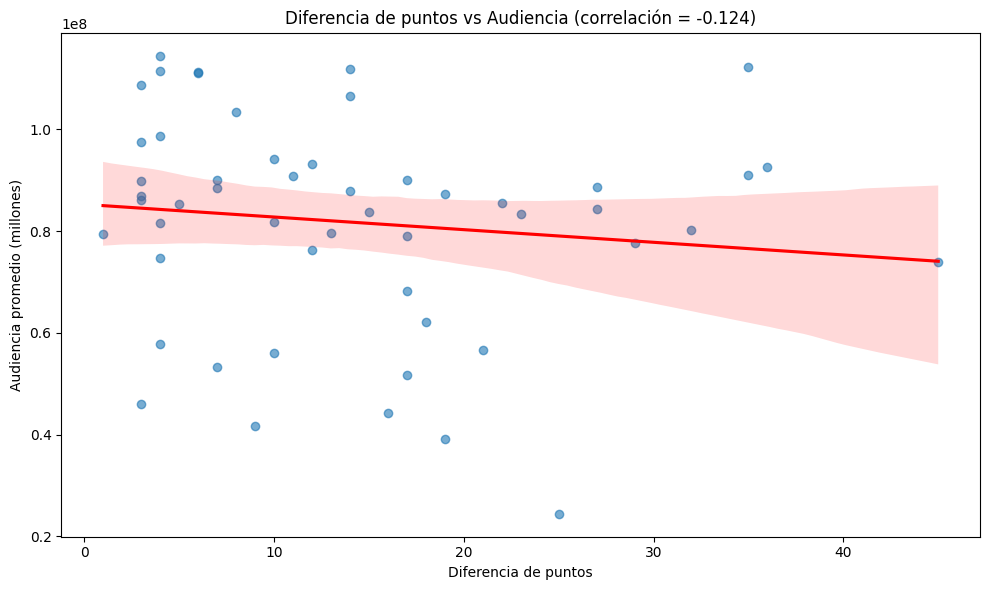

In [33]:
plt.figure(figsize=(10,6))
sns.regplot(
    data=merged_df,
    x="difference_pts",
    y="average_viewers",
    scatter_kws={"alpha": 0.6},
    line_kws={"color": "red"}
)
plt.title(f"Diferencia de puntos vs Audiencia (correlación = {corr_value:.3f})")
plt.xlabel("Diferencia de puntos")
plt.ylabel("Audiencia promedio (millones)")
plt.tight_layout()
plt.show()

No se observa correlación entre la diferencia de puntos en la final y la audiencia.

In [34]:
merged_df.head(3)

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,coach_winner,team_loser,losing_pts,qb_loser_1,coach_loser,combined_pts,difference_pts,musician,average_viewers,_merge
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,Doug Pederson,New England Patriots,33,Tom Brady,Bill Belichick,74,8,"Justin Timberlake, University of Minnesota Mar...",103470000,both
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,Bill Belichick,Atlanta Falcons,28,Matt Ryan,Dan Quinn,62,6,Lady Gaga,111320000,both
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,Gary Kubiak,Carolina Panthers,10,Cam Newton,Ron Rivera,34,14,"Coldplay, Beyoncé, Bruno Mars, Mark Ronson, Un...",111860000,both


In [35]:
merged_df["date"] = pd.to_datetime(merged_df["date"], errors="coerce")
merged_df["year"] = merged_df["date"].dt.year
merged_df[["super_bowl", "date", "year"]].head(3)

,super_bowl,date,year
0,52,2018-02-04,2018
1,51,2017-02-05,2017
2,50,2016-02-07,2016


In [36]:
merged_df["musician"] = merged_df["musician"].fillna("").astype(str)

In [37]:
def count_artists(musicians_str):
    return len([artist.strip() for artist in musicians_str.split(",") if artist.strip() != ""])


In [38]:
merged_df["num_artists"] = merged_df["musician"].apply(count_artists)

In [39]:
artists_per_year = (
    merged_df.groupby("year", as_index=False)["num_artists"]
    .sum()
    .sort_values("year")
)

print(artists_per_year.head())

   year  num_artists
0  1967            3
1  1968            1
2  1969            1
3  1970            4
4  1971            1


In [40]:
fig = px.bar(
    artists_per_year,
    x="year",
    y="num_artists",
    title="Número de artistas en el Halftime Show por año",
    labels={"year": "Año", "num_artists": "Nº de artistas"},
)
fig.update_layout(template="plotly_white", xaxis=dict(tickmode="linear"))
fig.show()

In [41]:
corr_numartist_audience = merged_df["num_artists"].corr(merged_df["average_viewers"], method="pearson")


In [42]:
fig = px.scatter(
    merged_df,
    x="num_artists",
    y="average_viewers",
    trendline="ols",
    title=f"Relación entre número de artistas y audiencia (correlación = {corr_value:.3f})",
    labels={
        "num_artists": "Número de artistas en el Halftime Show",
        "average_viewers": "Audiencia promedio (millones)"
    }
)
fig.update_traces(marker=dict(size=10, opacity=0.7))
fig.update_layout(template="plotly_white")
fig.show()

No encontramos correlación entre el número de artistas que participan en el Halftime Show y la audiencia.

In [43]:
merged_df.head(3)

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,coach_winner,...,losing_pts,qb_loser_1,coach_loser,combined_pts,difference_pts,musician,average_viewers,_merge,year,num_artists
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,Doug Pederson,...,33,Tom Brady,Bill Belichick,74,8,"Justin Timberlake, University of Minnesota Mar...",103470000,both,2018,2
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,Bill Belichick,...,28,Matt Ryan,Dan Quinn,62,6,Lady Gaga,111320000,both,2017,1
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,Gary Kubiak,...,10,Cam Newton,Ron Rivera,34,14,"Coldplay, Beyoncé, Bruno Mars, Mark Ronson, Un...",111860000,both,2016,7


In [61]:
merged_df.head(3)

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,coach_winner,...,losing_pts,qb_loser_1,coach_loser,combined_pts,difference_pts,musician,average_viewers,_merge,year,num_artists
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,Doug Pederson,...,33,Tom Brady,Bill Belichick,74,8,"Justin Timberlake, University of Minnesota Mar...",103470000,both,2018,2
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,Bill Belichick,...,28,Matt Ryan,Dan Quinn,62,6,Lady Gaga,111320000,both,2017,1
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,Gary Kubiak,...,10,Cam Newton,Ron Rivera,34,14,"Coldplay, Beyoncé, Bruno Mars, Mark Ronson, Un...",111860000,both,2016,7


,super_bowl,super_bowl_number,date,network,average_viewers,total_viewers,household_rating,household_share,cost_of_30_second_ad_usd,year
0,<NA>,1,1967-01-15,NBC,24430000,35600000.0,18.5,36,37500,1967
1,<NA>,2,1968-01-14,CBS,39120000,51300000.0,36.8,68,54500,1968


In [64]:
add_price_evolution = px.line(
    super_bowl_ratings_df.sort_values("year"),
    x="year",
    y="cost_of_30_second_ad_usd",
    markers=True,
    title="Evolución del precio de los anuncios de 30 segundos en el Super Bowl",
    labels={
        "year": "Año",
        "cost_of_30_second_ad_usd": "Costo de anuncio (USD)"
    }
)

add_price_evolution.update_layout(
    template="plotly_white",
    xaxis=dict(tickmode="linear"),
    yaxis_tickprefix="$",
    yaxis_tickformat=",",
)
add_price_evolution.show()

In [76]:
viewers_year = px.line(
    super_bowl_ratings_df.sort_values("year"),
    x="year",
    y="average_viewers",
    markers=True,
    title="Evolución de la audiencia por año",
    labels={
        "year": "Año",
        "average_viewers" : "Audiencia media",
    }
)

viewers_year.update_layout(
    template="plotly_white",
    xaxis=dict(tickmode="linear"),
    yaxis_tickformat=",",
)
viewers_year.show()

In [69]:
super_bowl_ratings_df["average_viewers"] = pd.to_numeric(super_bowl_ratings_df["average_viewers"], errors="coerce")
super_bowl_ratings_df["cost_of_30_second_ad_usd"] = pd.to_numeric(super_bowl_ratings_df["cost_of_30_second_ad_usd"], errors="coerce")

# 2️⃣ Calcular la correlación de Pearson
corr_value = super_bowl_ratings_df["average_viewers"].corr(
    super_bowl_ratings_df["cost_of_30_second_ad_usd"], method="pearson"
)

print(f"📊 Correlación de Pearson entre audiencia media y coste del anuncio: {corr_value:.3f}")

# 3️⃣ Crear el gráfico
fig = px.scatter(
    super_bowl_ratings_df,
    x="average_viewers",
    y="cost_of_30_second_ad_usd",
    trendline="ols",
    title=f"Relación entre audiencia y costo de anuncios (r = {corr_value:.3f})",
    labels={
        "average_viewers": "Audiencia promedio (millones)",
        "cost_of_30_second_ad_usd": "Costo de anuncio (USD)"
    }
)

fig.update_traces(marker=dict(size=10, opacity=0.7))
fig.update_layout(template="plotly_white")
fig.show()


📊 Correlación de Pearson entre audiencia media y coste del anuncio: 0.763


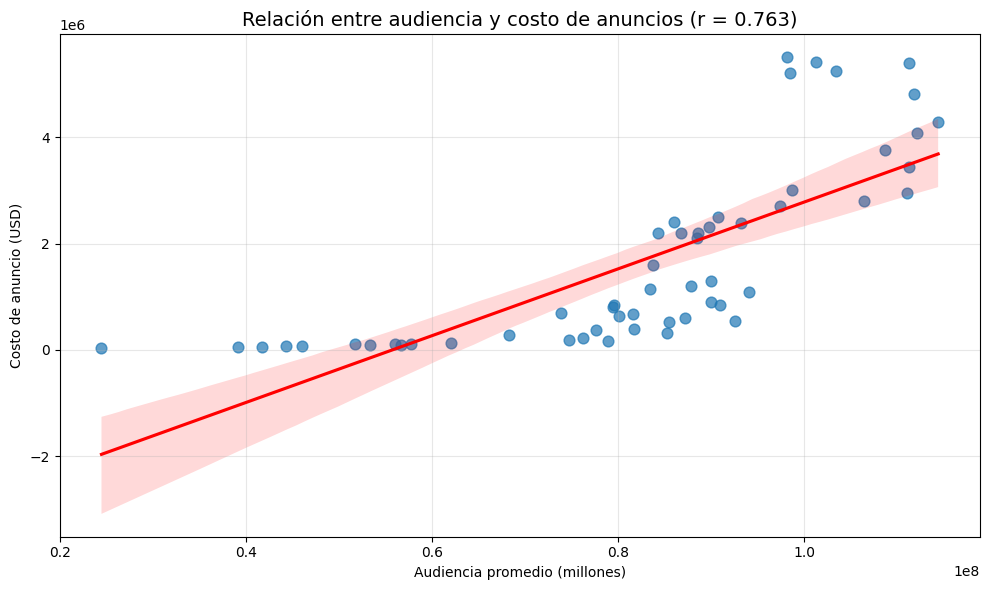

In [70]:
plt.figure(figsize=(10, 6))
sns.regplot(
    data=super_bowl_ratings_df,
    x="average_viewers",
    y="cost_of_30_second_ad_usd",
    scatter_kws={"alpha": 0.7, "s": 60},
    line_kws={"color": "red"},
)

# 4️⃣ Personalizar el gráfico
plt.title(f"Relación entre audiencia y costo de anuncios (r = {corr_value:.3f})", fontsize=14)
plt.xlabel("Audiencia promedio (millones)")
plt.ylabel("Costo de anuncio (USD)")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

Se confirma la HIPÓTESIS NÚMERO 1

In [83]:
musicians_df.iloc[30:80:]

,super_bowl,musician
30,44,The Who
31,43,Bruce Springsteen and the E Street Band
32,42,Tom Petty & the Heartbreakers
33,41,Prince
34,41,Florida A&M University Marching 100 Band
35,40,The Rolling Stones
36,39,Paul McCartney
37,38,Jessica Simpson
38,38,Janet Jackson
39,38,P. Diddy


In [84]:
merged_df.head(15)

,date,super_bowl,venue,city,state,attendance,team_winner,winning_pts,qb_winner_1,coach_winner,...,losing_pts,qb_loser_1,coach_loser,combined_pts,difference_pts,musician,average_viewers,_merge,year,num_artists
0,2018-02-04,52,U.S. Bank Stadium,Minneapolis,Minnesota,67612,Philadelphia Eagles,41,Nick Foles,Doug Pederson,...,33,Tom Brady,Bill Belichick,74,8,"Justin Timberlake, University of Minnesota Mar...",103470000,both,2018,2
1,2017-02-05,51,NRG Stadium,Houston,Texas,70807,New England Patriots,34,Tom Brady,Bill Belichick,...,28,Matt Ryan,Dan Quinn,62,6,Lady Gaga,111320000,both,2017,1
2,2016-02-07,50,Levi's Stadium,Santa Clara,California,71088,Denver Broncos,24,Peyton Manning,Gary Kubiak,...,10,Cam Newton,Ron Rivera,34,14,"Coldplay, Beyoncé, Bruno Mars, Mark Ronson, Un...",111860000,both,2016,7
3,2015-02-01,49,University of Phoenix Stadium,Glendale,Arizona,70288,New England Patriots,28,Tom Brady,Bill Belichick,...,24,Russell Wilson,Pete Carroll,52,4,"Katy Perry, Lenny Kravitz, Missy Elliott, Ariz...",114440000,both,2015,4
4,2014-02-02,48,MetLife Stadium,East Rutherford,New Jersey,82529,Seattle Seahawks,43,Russell Wilson,Pete Carroll,...,8,Peyton Manning,John Fox,51,35,"Bruno Mars, Red Hot Chili Peppers",112190000,both,2014,2
5,2013-02-03,47,Mercedes-Benz Superdome,New Orleans,Louisiana,71024,Baltimore Ravens,34,Joe Flacco,John Harbaugh,...,31,Colin Kaepernick,Jim Harbaugh,65,3,"Beyoncé, Destiny's Child, Kelly Rowland, Miche...",108690000,both,2013,4
6,2012-02-05,46,Lucas Oil Stadium,Indianapolis,Indiana,68658,New York Giants,21,Eli Manning,Tom Coughlin,...,17,Tom Brady,Bill Belichick,38,4,"Madonna, LMFAO, Nicki Minaj, M.I.A., Cee Lo Green",111350000,both,2012,5
7,2011-02-06,45,Cowboys Stadium,Arlington,Texas,103219,Green Bay Packers,31,Aaron Rodgers,Mike McCarthy,...,25,Ben Roethlisberger,Mike Tomlin,56,6,"The Black Eyed Peas, Slash, Usher, will.i.am, ...",111040000,both,2011,5
8,2010-02-07,44,Sun Life Stadium,Miami Gardens,Florida,74059,New Orleans Saints,31,Drew Brees,Sean Payton,...,17,Peyton Manning,Jim Caldwell,48,14,The Who,106480000,both,2010,1
9,2009-02-01,43,Raymond James Stadium,Tampa,Florida,70774,Pittsburgh Steelers,27,Ben Roethlisberger,Mike Tomlin,...,23,Kurt Warner,Ken Whisenhunt,50,4,Bruce Springsteen and the E Street Band,98730000,both,2009,1
